<a href="https://colab.research.google.com/github/sindhuparusha225/AIML-2303A52207/blob/main/AIML__Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Apply KNN on a classification dataset with k=3 and evaluate its accuracy.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_table("/content/loan_data.csv",sep=',', index_col=0)
df.head()

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,,,,,,,,,,,,,
22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 45000 entries, 22.0 to 24.0
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_gender                   45000 non-null  object 
 1   person_education                45000 non-null  object 
 2   person_income                   45000 non-null  float64
 3   person_emp_exp                  45000 non-null  int64  
 4   person_home_ownership           45000 non-null  object 
 5   loan_amnt                       45000 non-null  float64
 6   loan_intent                     45000 non-null  object 
 7   loan_int_rate                   45000 non-null  float64
 8   loan_percent_income             45000 non-null  float64
 9   cb_person_cred_hist_length      45000 non-null  float64
 10  credit_score                    45000 non-null  int64  
 11  previous_loan_defaults_on_file  45000 non-null  object 
 12  loan_status                     450

In [ ]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN (k=3): {accuracy:.2f}")

Accuracy of KNN (k=3): 0.88


2. Visualize the decision boundary for KNN with k=3.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [ ]:
meshgrid_data = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
feature_means = X_train[:, 2:].mean(axis=0)

In [ ]:
remaining_features = np.tile(feature_means, (meshgrid_data.shape[0], 1))

In [ ]:
meshgrid_data_full = np.hstack([meshgrid_data, remaining_features])

In [ ]:
Z = knn.predict(meshgrid_data_full)
Z = Z.reshape(xx.shape)

<ipython-input-20-87b3489dd7ba>:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='coolwarm', label="Test Set", marker='x')


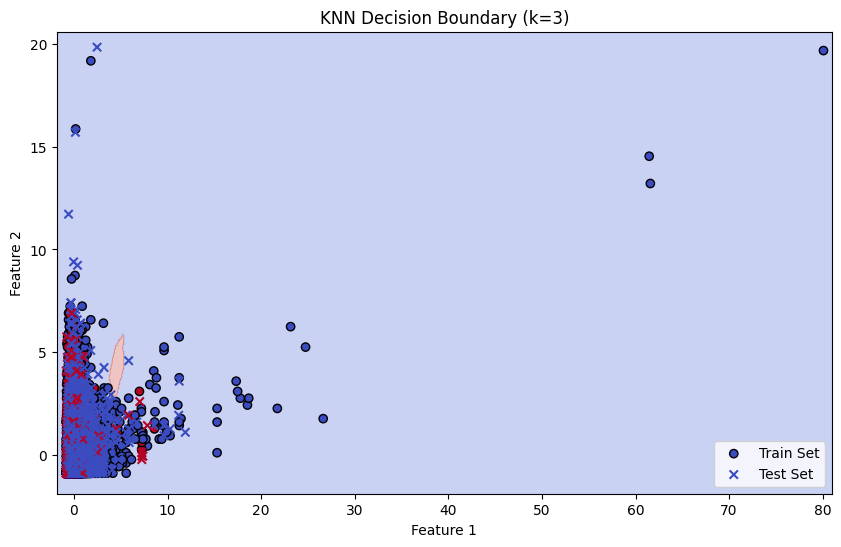

In [ ]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='coolwarm', label="Train Set", marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='coolwarm', label="Test Set", marker='x')
plt.title("KNN Decision Boundary (k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

3. Split the dataset into training and testing sets and compute the confusion
matrix.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

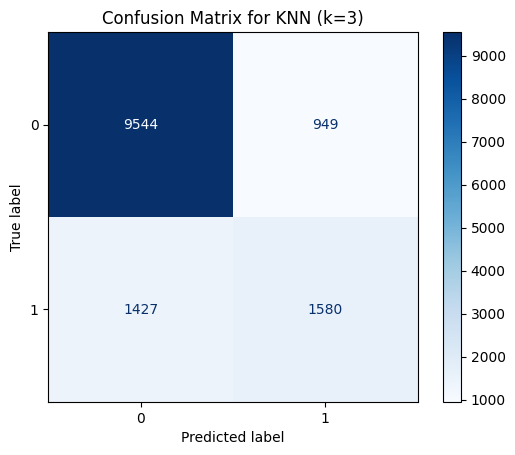

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for KNN (k=3)")
plt.show()

In [ ]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[9544  949]
 [1427 1580]]


4. Compare the performance of KNN with and without feature scaling.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
knn_no_scaling = KNeighborsClassifier(n_neighbors=3)
knn_no_scaling.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_no_scaling = knn_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f"Accuracy of KNN without scaling: {accuracy_no_scaling:.2f}")


Accuracy of KNN without scaling: 0.82


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
knn_with_scaling = KNeighborsClassifier(n_neighbors=3)
knn_with_scaling.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_with_scaling = knn_with_scaling.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
print(f"Accuracy of KNN with scaling: {accuracy_with_scaling:.2f}")

Accuracy of KNN with scaling: 0.88


In [ ]:
y_pred_with_scaling = knn_with_scaling.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
print(f"Accuracy of KNN with scaling: {accuracy_with_scaling:.2f}")

Accuracy of KNN with scaling: 0.88


5. Tune the value of k (e.g., test with k=5) and compare performance.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
knn_k3 = KNeighborsClassifier(n_neighbors=3)
knn_k3.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_k3 = knn_k3.predict(X_test_scaled)
accuracy_k3 = accuracy_score(y_test, y_pred_k3)
print(f"Accuracy of KNN with k=3: {accuracy_k3:.2f}")


Accuracy of KNN with k=3: 0.88


In [ ]:
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_k5 = knn_k5.predict(X_test_scaled)
accuracy_k5 = accuracy_score(y_test, y_pred_k5)
print(f"Accuracy of KNN with k=5: {accuracy_k5:.2f}")


Accuracy of KNN with k=5: 0.89
